# 其他視覺化類型

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from pyquery import PyQuery as pq

## 案例1：一組文字資料(類別變數)的相異觀測數量
**樹狀圖(Treemap)**  
例如: 想知道球季中球隊陣容組成  

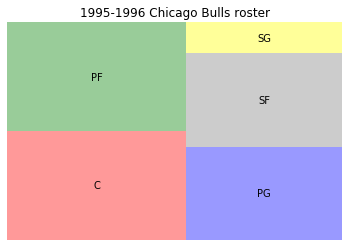

In [2]:
# treemap


csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()
squarify.plot(sizes=pos.values, label=pos.index, color=["red", "green", "blue", "grey", "yellow"], alpha=0.4) ## treemap
plt.axis('off')
plt.title("1995-1996 Chicago Bulls roster")
plt.show()

## 案例2：一組數值資料依照類別分組排序
**棒棒糖圖(Lollipop)**  
是散佈圖與長條圖的混合圖    
用 plt.plot()、 plt.hline() 實現  

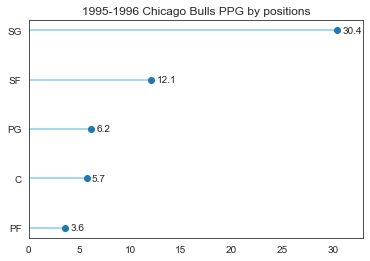

In [3]:
per_game_url = "https://storage.googleapis.com/ds_data_import/stats_per_game_chicago_bulls_1995_1996.csv"
player_info_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
per_game = pd.read_csv(per_game_url)
player_info = pd.read_csv(player_info_url)
df = pd.merge(player_info, per_game[["Name", "PTS/G"]], left_on="Player", right_on="Name")
grouped = df.groupby("Pos")
points_per_game = grouped["PTS/G"].mean()
points_per_game = points_per_game.sort_values()
sns.set_style("white")
plt.plot(points_per_game, range(1, points_per_game.size + 1), 'o')
plt.hlines(y=range(1, points_per_game.size + 1), xmin=0, xmax=points_per_game, color='skyblue')
plt.yticks(range(1, points_per_game.size + 1), points_per_game.index)
plt.xlim(0, 33)
for i, v in enumerate(points_per_game):
    plt.text(v + 0.5, i + 0.95, "{:.1f}".format(v))
plt.title("1995-1996 Chicago Bulls PPG by positions")
plt.show()

## 案例3：一組數值資料的分布
**密度圖(Density plot)**
用 Seaborn 中的 kdeplot() 實現  

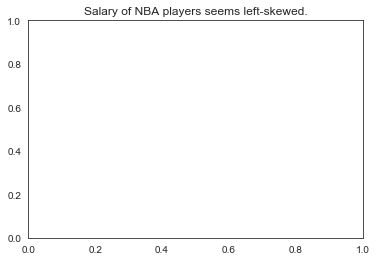

In [4]:
def get_nba_salary():
    """
    Get NBA players' salary from SPORTRAC.COM
    """
    nba_salary_ranking_url = "https://www.spotrac.com/nba/rankings/"
    html_doc = pq(nba_salary_ranking_url)
    player_css = ".team-name"
    pos_css = ".rank-position"
    salary_css = ".info"
    players = [p.text for p in html_doc(player_css)]
    positions = [p.text for p in html_doc(pos_css)]
    salaries = [s.text.replace("$", "") for s in html_doc(salary_css)]
    salaries = [int(s.replace(",", "")) for s in salaries]
    df = pd.DataFrame()
    df["player"] = players
    df["pos"] = positions
    df["salary"] = salaries
    return df

nba_salary = get_nba_salary()
sns.kdeplot(nba_salary['salary'], shade=True) ## Density plot
plt.title("Salary of NBA players seems left-skewed.")
plt.show()

##2020/03/15註記: 現在爬不到NBA資料(可能因為疫情停賽的關係?)

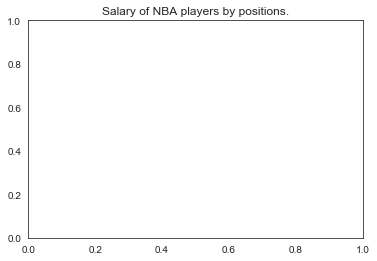

In [5]:
nba_salary = get_nba_salary()
wide_format = nba_salary.pivot(index='player', columns='pos', values='salary')
colors = ["r", "g", "b", "c", "m"]
positions = nba_salary["pos"].unique()
for color, pos in zip(colors, positions):
  sns.kdeplot(wide_format[pos][wide_format[pos].notna()], shade=True, color=color, alpha = 0.5)

plt.title("Salary of NBA players by positions.")
plt.show()

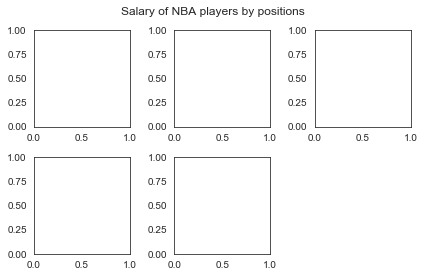

In [6]:
nba_salary = get_nba_salary()
fig, axes = plt.subplots(2, 3)
wide_format = nba_salary.pivot(index='player', columns='pos', values='salary')
colors = ["r", "g", "b", "c", "m"]
positions = nba_salary["pos"].unique()
ax_rows = [0, 0, 0, 1, 1]
ax_cols = [0, 1, 2, 0, 1]
for pos, color, ax_row, ax_col in zip(positions, colors, ax_rows, ax_cols):
  sns.kdeplot(wide_format[pos][wide_format[pos].notna()], shade=True, color=color, alpha = 0.5, ax=axes[ax_row, ax_col], legend=False)
  axes[ax_row, ax_col].set_title(pos)

axes[1, 2].set_visible(False) # hiding the sixth subplot
fig.suptitle("Salary of NBA players by positions")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 案例4：一組數值資料依類別分組的分佈
**堆疊密度圖**  
* Seaborn 中的 kdeplot() 實現

**小提琴圖**  
* seaborn 中的 violinplot() 

兩者皆用於理解資料的峰度以及偏態

In [ ]:
nba_salary = get_nba_salary()
sns.violinplot(x=nba_salary["pos"], y=nba_salary["salary"])
plt.title("Salary of NBA players by positions")
plt.xlabel("Positions")
plt.show()

## 案例5：多組數值資料的相關
**熱圖(heatmap)**  
**色彩圖(color map)**  
* seaborn 中的 heatmap()


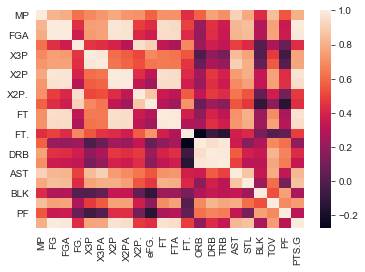

In [7]:
df = pd.read_csv("https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996_per_game.csv")
df_numerics = df.iloc[:, 4:]
corr_matrix = df_numerics.corr()
sns.heatmap(corr_matrix)
plt.show()

## 案例6：證券的OHLC趨勢
**線圖(Line graph)**  
* plotly 的 Candlestick()

In [ ]:
import requests
import datetime
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go

def get_ohlc(twse_ticker):
    """
    Get ohlc data for current month
    """
    today = datetime.datetime.today().strftime('%Y%m%d')
    twse_url = "http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={}&stockNo={}".format(today, twse_ticker)
    stock = requests.get(twse_url).json()
    trading_dates = []
    opens = []
    highs = []
    lows = []
    closes = []
    for i in range(len(stock["data"])):
        trading_dates.append(stock["data"][i][0])
        opens.append(float(stock["data"][i][3]))
        highs.append(float(stock["data"][i][4]))
        lows.append(float(stock["data"][i][5]))
        closes.append(float(stock["data"][i][6]))

    trading_dates_year = [str(int(td.split("/")[0]) + 1911) for td in trading_dates]
    trading_dates_month = [td.split("/")[1] for td in trading_dates]
    trading_dates_day = [td.split("/")[2] for td in trading_dates]
    trading_dates = ["{}-{}-{}".format(yr, m, d) for yr, m, d in zip(trading_dates_year, trading_dates_month, trading_dates_day)]
    trading_dates = pd.to_datetime(trading_dates)
    df = pd.DataFrame()
    df["trading_date"] = trading_dates
    df["open"] = opens
    df["high"] = highs
    df["low"] = lows
    df["close"] = closes
    df = df.set_index("trading_date")
    return df

tsmc = get_ohlc('2330')
py.sign_in('USERNAME', 'APIKEY') # Use your own plotly Username / API Key
trace = go.Candlestick(x=tsmc.index,
                       open=tsmc["open"],
                       high=tsmc["high"],
                       low=tsmc["low"],
                       close=tsmc["close"])
layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)
data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='simple_candlestick')

## 案例7：數值資料依地理資訊的摘要
**Choropleth map**  
繪製前需要兩份資料  
1. 地理區域的geojson檔
2. 映射到地理區域上的數值資料

例如: 呈現台灣PM2.5濃度分布

實現步驟:
1. folium 中的 Map()  建立出以OpenStreetMap為地圖圖層的物件
2. 指定台灣geojson檔案的COUNTYNAME作為key_on=的參數 跟空氣品質資料的county變數關聯

In [ ]:
import pandas as pd
import folium

pm25_url = "https://storage.googleapis.com/ds_data_import/2017_avg_pm25.csv"
pm25 = pd.read_csv(pm25_url)
# 調整臺為台
pm25["county"] = pm25["county"].str.replace("臺", "台")
# 調整桃園市為桃園縣
pm25["county"] = pm25["county"].str.replace("桃園市", "桃園縣")
geojson = "twCounty2010.geo.json"

m = folium.Map(location=[24, 121], zoom_start=7)

m.choropleth(
    geo_data=geojson,
    name='choropleth',
    data=pm25,
    columns=['county', 'avg_pm25'],
    key_on='feature.properties.COUNTYNAME',
    fill_color='RdYlGn_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='PM2.5'
)

folium.LayerControl().add_to(m)
m